**Task** 1
Data preparation and customer analytics
Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import xlrd
%matplotlib inline
import plotly.graph_objects as go

In [ ]:
transaction_data=pd.read_excel("QVI_transaction_data.xlsx")
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [ ]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

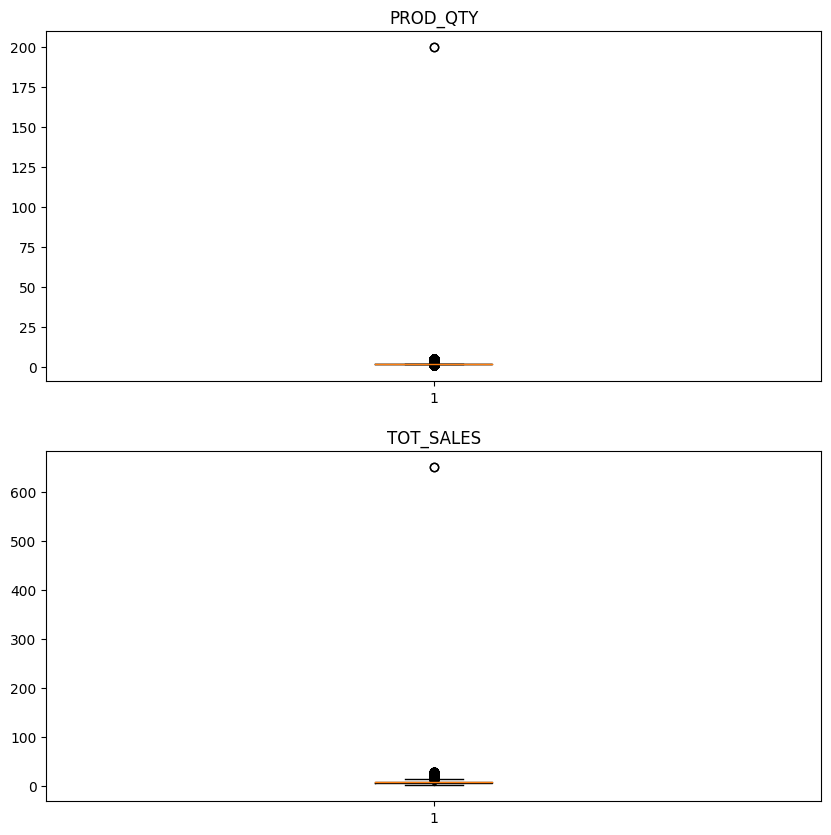

In [ ]:
figure, axis=plt.subplots(2,1,figsize=(10,10))
axis[0].boxplot(transaction_data["PROD_QTY"])
axis[1].boxplot(transaction_data["TOT_SALES"])
axis[0].set_title("PROD_QTY")
axis[1].set_title("TOT_SALES")
plt.show()

Let's remove outliers with the quartile method.

In [ ]:
q1 = transaction_data['PROD_QTY'].quantile(0.25)
q3 = transaction_data['PROD_QTY'].quantile(0.75)
iqr = q3 - q1
multiplier = 1.5
lower_bound = q1 - multiplier * iqr
upper_bound = q3 + multiplier * iqr
transaction_data = transaction_data[(transaction_data['PROD_QTY'] >= lower_bound) & (transaction_data['PROD_QTY'] <= upper_bound)]
transaction_data = transaction_data.reset_index(drop=True)
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
2,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2
3,43603,9,9208,8634,15,Twisties Cheese 270g,2,9.2
4,43327,38,38142,34181,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2
...,...,...,...,...,...,...,...,...
236034,43416,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6
236035,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
236036,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
236037,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


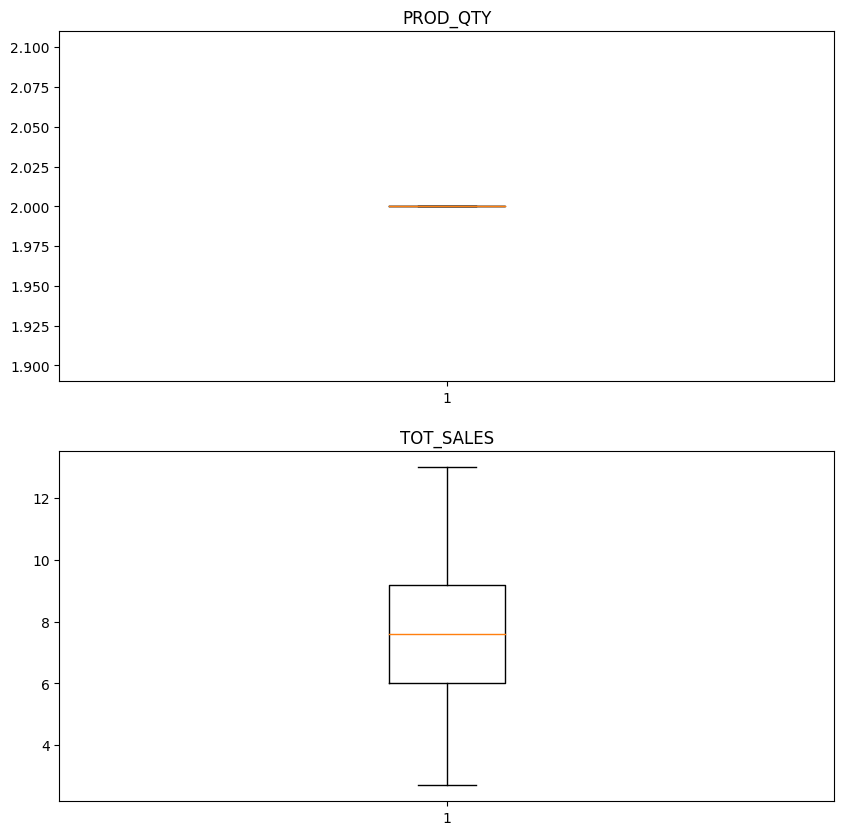

In [ ]:
figure, axis=plt.subplots(2,1,figsize=(10,10))
axis[0].boxplot(transaction_data["PROD_QTY"])
axis[1].boxplot(transaction_data["TOT_SALES"])
axis[0].set_title("PROD_QTY")
axis[1].set_title("TOT_SALES")
plt.show()

 The DATE column in the dataset is in the Microsoft Excel serial time format, which is the number of days since the number of days since 1st January 1900, so it's better to convert.







In [ ]:
date=transaction_data["DATE"].tolist()

for i in range(len(date)):
    date[i]=xlrd.xldate_as_datetime(date[i], 0)

transaction_data["DATE"]=date
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
2,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2
3,2019-05-18,9,9208,8634,15,Twisties Cheese 270g,2,9.2
4,2018-08-15,38,38142,34181,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2
...,...,...,...,...,...,...,...,...
236034,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6
236035,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
236036,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
236037,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


Let's go through the purchase behaviour dataset

In [ ]:
purchase_behaviour=pd.read_csv("QVI_purchase_behaviour.csv")
purchase_behaviour

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [ ]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
purchase_behaviour.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Let's merge both data set

In [ ]:
df=pd.merge(transaction_data, purchase_behaviour, on="LYLTY_CARD_NBR")
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-04,7,7150,6899,90,Tostitos Smoked Chipotle 175g,2,8.8,MIDAGE SINGLES/COUPLES,Budget
4,2018-10-31,7,7150,6901,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
236034,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,YOUNG SINGLES/COUPLES,Premium
236035,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
236036,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
236037,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236039 entries, 0 to 236038
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              236039 non-null  datetime64[ns]
 1   STORE_NBR         236039 non-null  int64         
 2   LYLTY_CARD_NBR    236039 non-null  int64         
 3   TXN_ID            236039 non-null  int64         
 4   PROD_NBR          236039 non-null  int64         
 5   PROD_NAME         236039 non-null  object        
 6   PROD_QTY          236039 non-null  int64         
 7   TOT_SALES         236039 non-null  float64       
 8   LIFESTAGE         236039 non-null  object        
 9   PREMIUM_CUSTOMER  236039 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 19.8+ MB


 Storing the distinct products from the df into a list.

In [ ]:
unique_products=list(df["PROD_NAME"].unique())
print("Total Distinct Products:", len(unique_products))

Total Distinct Products: 114


The 114 products aren't entirely different because of the pack size and brand name they are differently classified.

In [ ]:
df["PROD_NAME_NEW"]=df["PROD_NAME"].str.replace("\d+g", "")
df["PROD_SIZE"]=df["PROD_NAME"].str.extract("(\d+)")
df["PROD_NAME"]=df["PROD_NAME_NEW"]
df=df.drop("PROD_NAME_NEW", axis=1)
df["BRAND_NAME"]=df["PROD_NAME"].str.split().str[0]
df=df.loc[:, ["DATE", "STORE_NBR", "LYLTY_CARD_NBR", "TXN_ID", "PROD_NBR", "PROD_NAME", "PROD_SIZE", "BRAND_NAME", "PROD_QTY", "TOT_SALES", "LIFESTAGE", "PREMIUM_CUSTOMER"]]
df

<ipython-input-15-6957f127beac>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["PROD_NAME_NEW"]=df["PROD_NAME"].str.replace("\d+g", "")


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,175,Natural,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170,Smiths,2,2.9,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,210,Grain,2,7.2,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-04,7,7150,6899,90,Tostitos Smoked Chipotle,175,Tostitos,2,8.8,MIDAGE SINGLES/COUPLES,Budget
4,2018-10-31,7,7150,6901,87,Infuzions BBQ Rib Prawn Crackers,110,Infuzions,2,7.6,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
236034,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy,175,Thins,2,6.6,YOUNG SINGLES/COUPLES,Premium
236035,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,175,Kettle,2,10.8,YOUNG SINGLES/COUPLES,Premium
236036,2018-11-06,272,272379,270187,51,Doritos Mexicana,170,Doritos,2,8.8,YOUNG SINGLES/COUPLES,Premium
236037,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,150,Doritos,2,7.8,YOUNG SINGLES/COUPLES,Premium


Adding brand and pack weight can help you classify distinct products and brands. Let's sort them by date so that we can check change overtime.

In [ ]:
df=df.sort_values(by="DATE")
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
159918,2018-07-01,119,119325,123396,15,Twisties Cheese,270,Twisties,2,9.2,RETIREES,Premium
32185,2018-07-01,45,45071,40807,43,Smith Crinkle Cut Bolognese,150,Smith,2,5.2,OLDER FAMILIES,Budget
161898,2018-07-01,174,174084,175089,28,Thins Potato Chips Hot & Spicy,175,Thins,2,6.6,RETIREES,Premium
69468,2018-07-01,164,164069,164212,56,Cheezels Cheese Box,125,Cheezels,2,4.2,OLDER FAMILIES,Premium
229624,2018-07-01,245,245339,247845,7,Smiths Crinkle Original,330,Smiths,2,11.4,YOUNG SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
104452,2019-06-30,235,235162,238113,9,Kettle Tortilla ChpsBtroot&Ricotta,150,Kettle,2,9.2,OLDER SINGLES/COUPLES,Mainstream
37755,2019-06-30,106,106257,108298,90,Tostitos Smoked Chipotle,175,Tostitos,2,8.8,OLDER FAMILIES,Budget
25074,2019-06-30,36,36187,32726,70,Tyrrells Crisps Lightly Salted,165,Tyrrells,2,8.4,NEW FAMILIES,Mainstream
54073,2019-06-30,81,81134,80342,9,Kettle Tortilla ChpsBtroot&Ricotta,150,Kettle,2,9.2,OLDER FAMILIES,Mainstream


In [ ]:
df=df.reset_index(drop=True)
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,119,119325,123396,15,Twisties Cheese,270,Twisties,2,9.2,RETIREES,Premium
1,2018-07-01,45,45071,40807,43,Smith Crinkle Cut Bolognese,150,Smith,2,5.2,OLDER FAMILIES,Budget
2,2018-07-01,174,174084,175089,28,Thins Potato Chips Hot & Spicy,175,Thins,2,6.6,RETIREES,Premium
3,2018-07-01,164,164069,164212,56,Cheezels Cheese Box,125,Cheezels,2,4.2,OLDER FAMILIES,Premium
4,2018-07-01,245,245339,247845,7,Smiths Crinkle Original,330,Smiths,2,11.4,YOUNG SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
236034,2019-06-30,235,235162,238113,9,Kettle Tortilla ChpsBtroot&Ricotta,150,Kettle,2,9.2,OLDER SINGLES/COUPLES,Mainstream
236035,2019-06-30,106,106257,108298,90,Tostitos Smoked Chipotle,175,Tostitos,2,8.8,OLDER FAMILIES,Budget
236036,2019-06-30,36,36187,32726,70,Tyrrells Crisps Lightly Salted,165,Tyrrells,2,8.4,NEW FAMILIES,Mainstream
236037,2019-06-30,81,81134,80342,9,Kettle Tortilla ChpsBtroot&Ricotta,150,Kettle,2,9.2,OLDER FAMILIES,Mainstream


In [ ]:
pd.date_range(start="2018-07-01", end="2019-06-30").difference(df["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

As we see there is a missing date where there is no entry let's store zero on that date.

In [ ]:
df=df.append({"DATE": pd.to_datetime("2018-12-25"), "STORE_NBR": 0, "LYLTY_CARD_NBR": 0, "TXN_ID": 0, "PROD_NBR": 0, "PROD_NAME": "None", "BRAND_NAME": "None", "PROD_SIZE": "0g", "PROD_QTY": 0, "TOT_SALES": 0, "LIFESTAGE": "None", "PREMIUM_CUSTOMER": "None"}, ignore_index=True)
df=df.sort_values(by="DATE")
df=df.reset_index(drop=True)
df

<ipython-input-19-79c2155317e5>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({"DATE": pd.to_datetime("2018-12-25"), "STORE_NBR": 0, "LYLTY_CARD_NBR": 0, "TXN_ID": 0, "PROD_NBR": 0, "PROD_NAME": "None", "BRAND_NAME": "None", "PROD_SIZE": "0g", "PROD_QTY": 0, "TOT_SALES": 0, "LIFESTAGE": "None", "PREMIUM_CUSTOMER": "None"}, ignore_index=True)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,119,119325,123396,15,Twisties Cheese,270,Twisties,2,9.2,RETIREES,Premium
1,2018-07-01,8,8046,7879,50,Tostitos Lightly Salted,175,Tostitos,2,8.8,MIDAGE SINGLES/COUPLES,Mainstream
2,2018-07-01,107,107093,108867,3,Kettle Sensations Camembert & Fig,150,Kettle,2,9.2,OLDER SINGLES/COUPLES,Budget
3,2018-07-01,115,115414,119020,58,Red Rock Deli Chikn&Garlic Aioli,150,Red,2,5.4,RETIREES,Mainstream
4,2018-07-01,108,108339,110148,30,Doritos Corn Chips Cheese Supreme,170,Doritos,2,8.8,NEW FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
236035,2019-06-30,32,32139,28848,32,Kettle Sea Salt And Vinegar,175,Kettle,2,10.8,YOUNG FAMILIES,Mainstream
236036,2019-06-30,65,65055,61905,75,Cobs Popd Sea Salt Chips,110,Cobs,2,7.6,RETIREES,Budget
236037,2019-06-30,102,102212,102822,92,WW Crinkle Cut Chicken,175,WW,2,3.4,MIDAGE SINGLES/COUPLES,Premium
236038,2019-06-30,30,30089,27024,70,Tyrrells Crisps Lightly Salted,165,Tyrrells,2,8.4,RETIREES,Budget


In [ ]:
date_sales=df.groupby("DATE")["TOT_SALES"].sum().reset_index()
date_sales

,DATE,TOT_SALES
0,2018-07-01,5174.6
1,2018-07-02,5101.8
2,2018-07-03,5116.6
3,2018-07-04,5108.8
4,2018-07-05,4860.6
...,...,...
360,2019-06-26,5036.0
361,2019-06-27,4959.2
362,2019-06-28,5072.2
363,2019-06-29,5307.8


Let's start visualization
We will plot Garph for the total duration of the total sale.

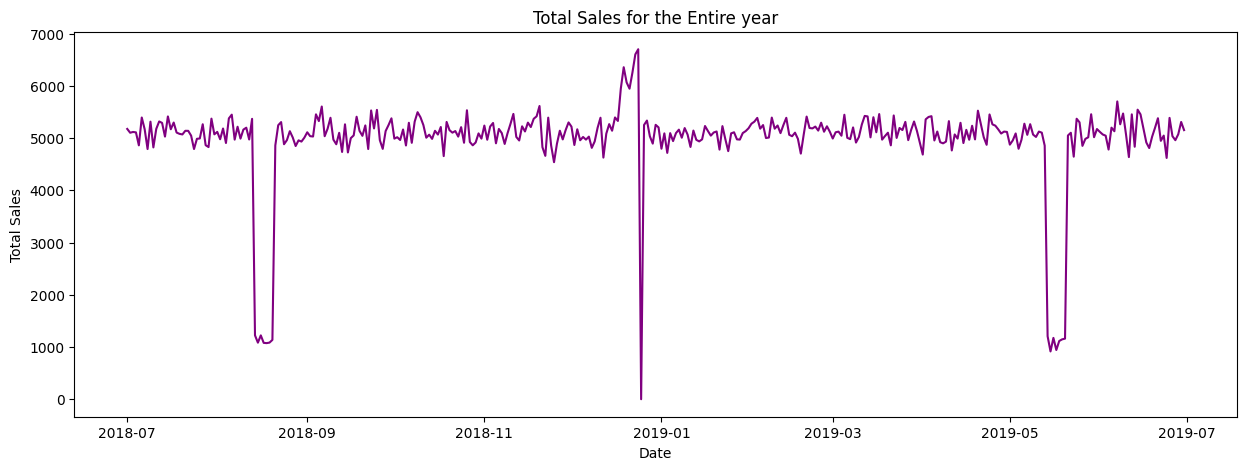

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(date_sales["DATE"], date_sales["TOT_SALES"],color="purple")
plt.title("Total Sales for the Entire year")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

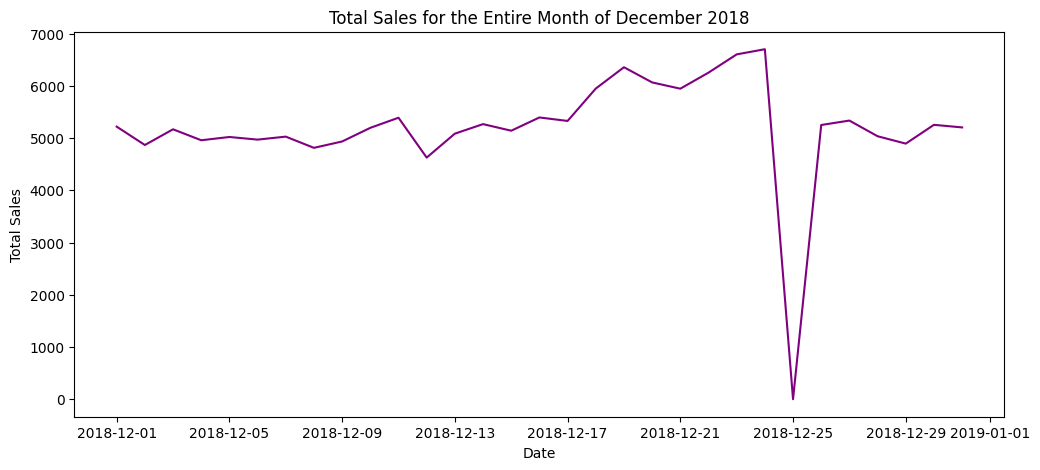

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(date_sales["DATE"][date_sales["DATE"].dt.month==12], date_sales["TOT_SALES"][date_sales["DATE"].dt.month==12], color="purple")
plt.title("Total Sales for the Entire Month of December 2018")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

As we can see the least sale was on end of 2018 which can be christmass day beacuse of holiday the store was closed.Now we can plot we pack size was sold the most in data.

Let's see which month has most sales.

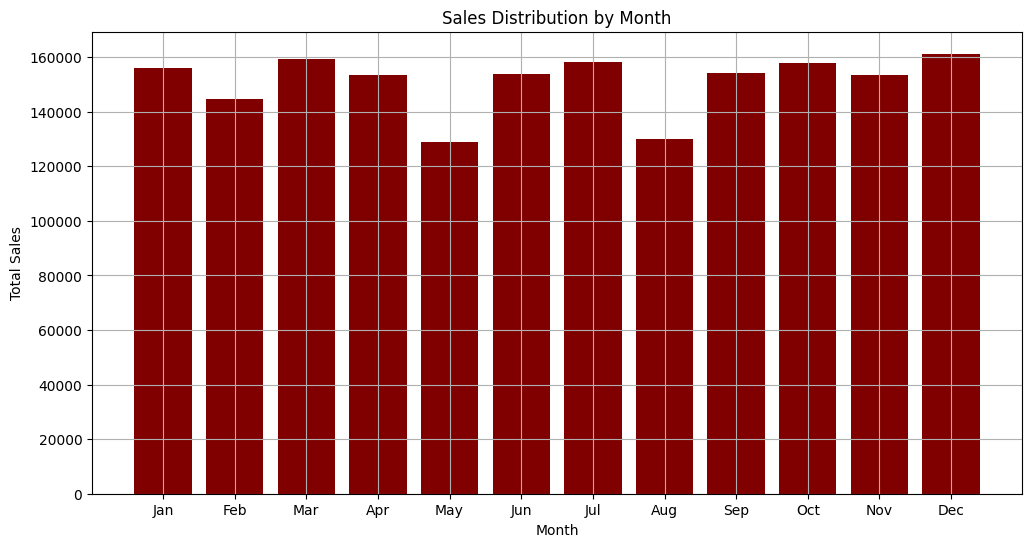

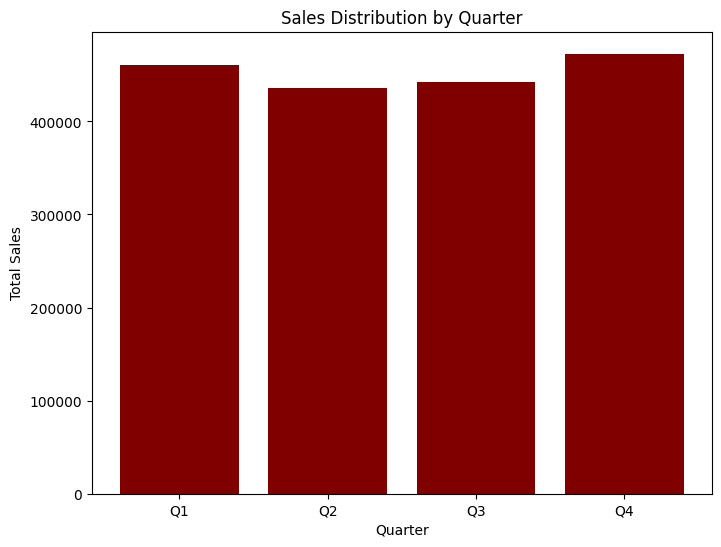

In [ ]:
df['Month'] = df['DATE'].dt.month
df['Quarter'] = df['DATE'].dt.quarter

sales_by_month = df.groupby('Month')['TOT_SALES'].sum()
sales_by_quarter = df.groupby('Quarter')['TOT_SALES'].sum()

plt.figure(figsize=(12, 6))
plt.bar([datetime.datetime(2000, month, 1).strftime('%b') for month in sales_by_month.index], sales_by_month.values,color="maroon")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales Distribution by Month')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(['Q{}'.format(quarter) for quarter in sales_by_quarter.index], sales_by_quarter.values,color="maroon")
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Sales Distribution by Quarter')
plt.grid(True)
plt.show()

In [ ]:
pack_sales=df.groupby("PROD_SIZE")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False)


In [ ]:
pack_sales=pack_sales.reset_index(drop=True)
pack_sales

,PROD_SIZE,TOT_SALES
0,175,454462.9
1,150,285216.8
2,134,166592.5
3,110,153504.8
4,170,137606.7
5,330,128694.6
6,300,105944.7
7,165,94401.2
8,380,71133.4
9,270,52108.8


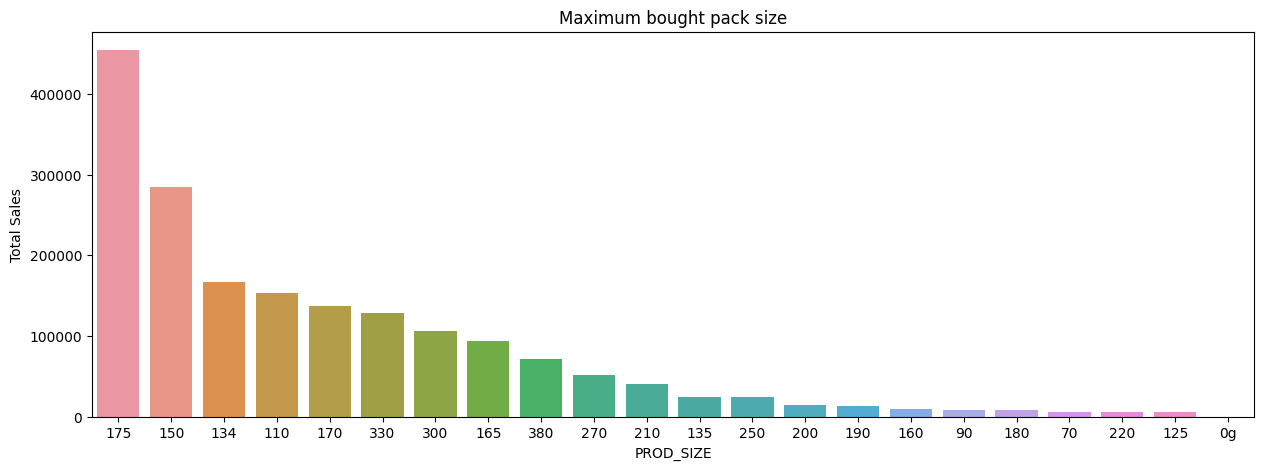

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x="PROD_SIZE", y="TOT_SALES", data=pack_sales)
plt.title("Maximum bought pack size")
plt.xlabel("PROD_SIZE")
plt.ylabel("Total Sales")
plt.show()

We can now go through the brand which was most sold.

In [ ]:
brand_sales=df.groupby("BRAND_NAME")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False)


In [ ]:
brand_sales=brand_sales.reset_index(drop=True)
brand_sales

,BRAND_NAME,TOT_SALES
0,Kettle,367253.6
1,Smiths,196084.9
2,Doritos,189497.4
3,Pringles,166592.5
4,Old,85215.9
5,Thins,83486.7
6,Twisties,76618.8
7,Tostitos,74923.2
8,Infuzions,71712.8
9,Cobs,66598.8


In [ ]:
plt.figure(figsize=(5, 5))
fig = go.Figure(go.Bar(
            x=brand_sales["TOT_SALES"],y=brand_sales["BRAND_NAME"],
            orientation='h'))
fig.show()

<Figure size 500x500 with 0 Axes>

The kettle has been the best brand. Now we can visualize for most loyal customer.



In [ ]:
df["LIFESTAGE"].value_counts()

OLDER SINGLES/COUPLES     48974
OLDER FAMILIES            45140
RETIREES                  43755
YOUNG FAMILIES            40184
YOUNG SINGLES/COUPLES     29853
MIDAGE SINGLES/COUPLES    22257
NEW FAMILIES               5876
None                          1
Name: LIFESTAGE, dtype: int64

In [ ]:
customer_sales=df.groupby("LIFESTAGE")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False)

In [ ]:
customer_sales=customer_sales.reset_index(drop=True)
customer_sales

,LIFESTAGE,TOT_SALES
0,OLDER SINGLES/COUPLES,378840.8
1,RETIREES,341435.9
2,OLDER FAMILIES,336657.5
3,YOUNG FAMILIES,300742.8
4,YOUNG SINGLES/COUPLES,235003.7
5,MIDAGE SINGLES/COUPLES,172705.8
6,NEW FAMILIES,46388.7
7,None,0.0


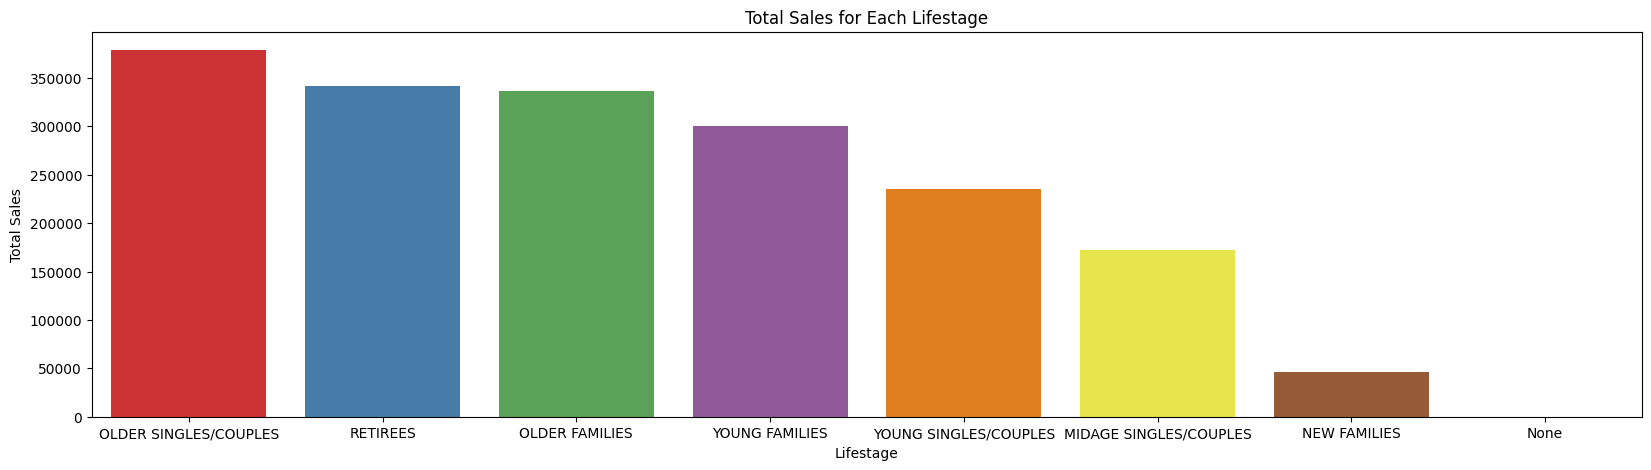

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x="LIFESTAGE", y="TOT_SALES", data=customer_sales, palette="Set1")
plt.title("Total Sales for Each Lifestage")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.show()

As we can older people are most loyal among all groups.Let's plot a graph for the premium customer.

In [ ]:
lifestage_segment=df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index().sort_values(by=["LIFESTAGE", "TOT_SALES"], ascending=[True, False])
lifestage_segment=lifestage_segment[lifestage_segment["LIFESTAGE"]!="None"]

In [ ]:
lifestage_segment=lifestage_segment.reset_index(drop=True)
lifestage_segment

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Mainstream,85283.1
1,MIDAGE SINGLES/COUPLES,Premium,54348.8
2,MIDAGE SINGLES/COUPLES,Budget,33073.9
3,NEW FAMILIES,Budget,20113.4
4,NEW FAMILIES,Mainstream,15660.7
5,NEW FAMILIES,Premium,10614.6
6,OLDER FAMILIES,Budget,160873.3
7,OLDER FAMILIES,Mainstream,98846.5
8,OLDER FAMILIES,Premium,76937.7
9,OLDER SINGLES/COUPLES,Budget,128835.0


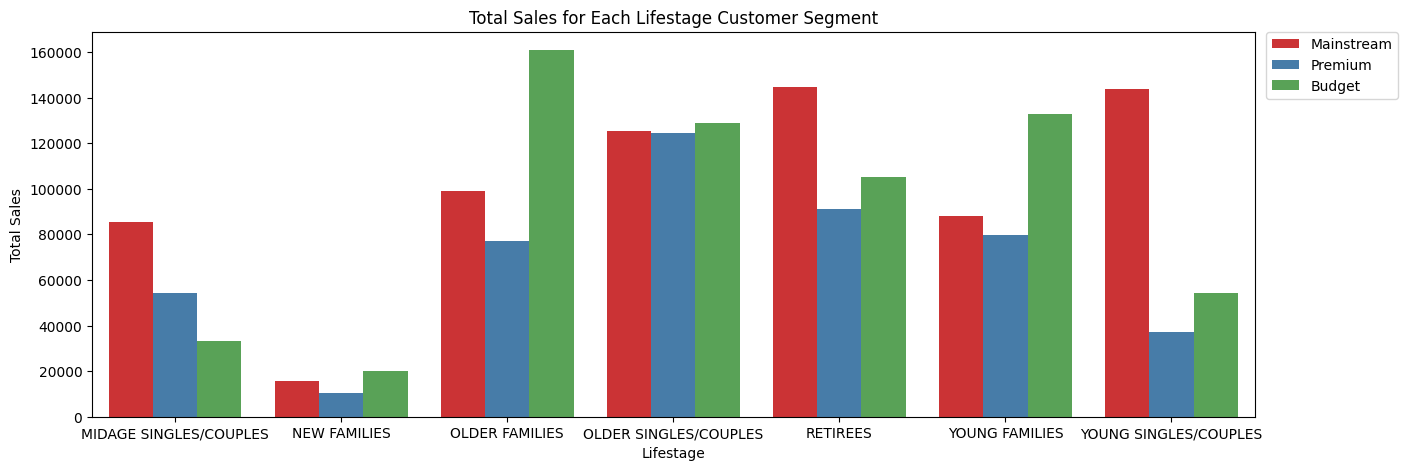

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER", data=lifestage_segment, palette="Set1")
plt.title("Total Sales for Each Lifestage Customer Segment")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

<Figure size 1000x600 with 0 Axes>

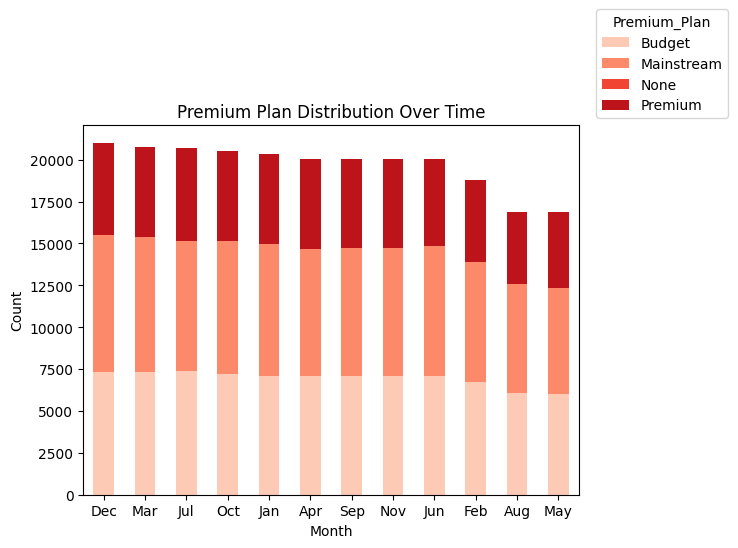

<Figure size 1000x600 with 0 Axes>

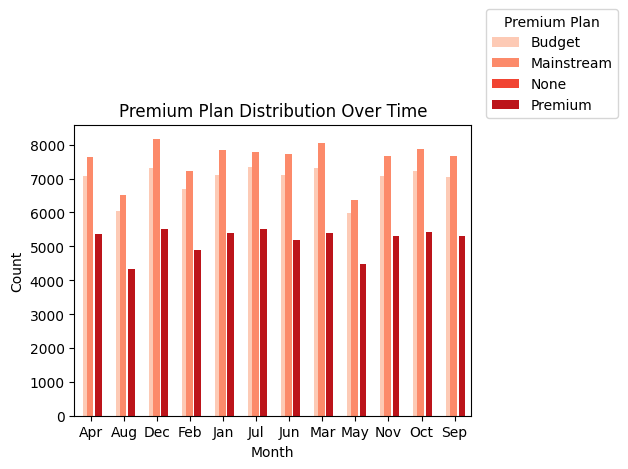

In [ ]:
df['Month'] = df['DATE'].dt.strftime('%b')

plan_counts = df.groupby(['Month', 'PREMIUM_CUSTOMER']).size().unstack()

colors = sns.color_palette('Reds', len(plan_counts.columns))

plan_counts_sorted = plan_counts.loc[plan_counts.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(10, 6))
plan_counts_sorted.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Premium Plan Distribution Over Time')
plt.legend(title='Premium Plan')
plt.xticks(rotation=0)

plt.legend(title='Premium_Plan', bbox_to_anchor=(1.02, 1), loc='lower left')
plt.show()


plt.figure(figsize=(10, 6))
ax = plan_counts.plot(kind='bar', color=colors)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Premium Plan Distribution Over Time')
plt.legend(title='Premium Plan')
plt.xticks(rotation=0)

num_bars = len(plan_counts.columns)
bar_width = 0.8 / num_bars
for i, container in enumerate(ax.containers):
    container_width = bar_width * (i + 0.5 - num_bars / 2)
    plt.setp(container, width=bar_width)

plt.legend(title='Premium Plan', bbox_to_anchor=(1.02, 1), loc='lower left')

plt.tight_layout()


plt.show()